# Kalorimetrie Küchentischversuch - Wärmekapazität eines Behälters

Author: Zidane Bürmann

Datum: 18.11.2023

Gruppe: 37

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Wie groß ist die Wärmekapazität des Wassers laut der Messung?

## Versuchsaufbau und Durchführung

Ich habe zwei Gläser mit Wasser befüllt und das Gewicht der Flüssigkeit mit einer Waage abgewogen. Das Wasser des ersten Glas war ca. Raumtemperatur und das andere bei ca. 40°.
Anschließend habe ich die Sensoren in die Gläser getan und über check_sensors() geschaut, wann die Sensoren die Wassertemperaturen angenommen haben. Ab da habe ich den Messvorgang gestartet und das wärmere Wasser inkl. Sensor in das Glas mit dem kälteren Wasser geschüttet. Den Messvorgang habe ich beendet als die Sensortemperaturen das erste Mal nahe beieinander waren.

![Versuchsaufbau-Wärmekapazität.jpg](figures/Versuchsaufbau-Wärmekapazität.jpg)

## Versuchsauswertung

In [1]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib

from functions import m_json

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Wärmekapazität eines Behälters

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [2]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.
path = '/home/jovyan/work/calorimetry_home/archive/Heat_Capacity_Experiment/Heat_Capacity_Experiment.h5'

# DONE #

In [3]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.
import h5py

f = h5py.File(path, 'r')
metadata = ['authors','created','experiment','group_number']
infos = []
for i in metadata:
    infos.append(f.attrs[i])

temperature_sensor1 = f['RawData']['Sensors']['1ee80bc8-0fb4-67b3-a290-2becf8e923b0']['Temperatures'][:]
temperature_sensor2 = f['RawData']['Sensors']['1ee80bd6-8100-61b5-8a1e-eb20a660622b']['Temperatures'][:]

timestamp_sensor1 = f['RawData']['Sensors']['1ee80bc8-0fb4-67b3-a290-2becf8e923b0']['Timestamps'][:]
timestamp_sensor2 = f['RawData']['Sensors']['1ee80bd6-8100-61b5-8a1e-eb20a660622b']['Timestamps'][:]

# DONE #

#### (ii) Daten ploten

Text(0, 0.5, 'Temperatur in °C')

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


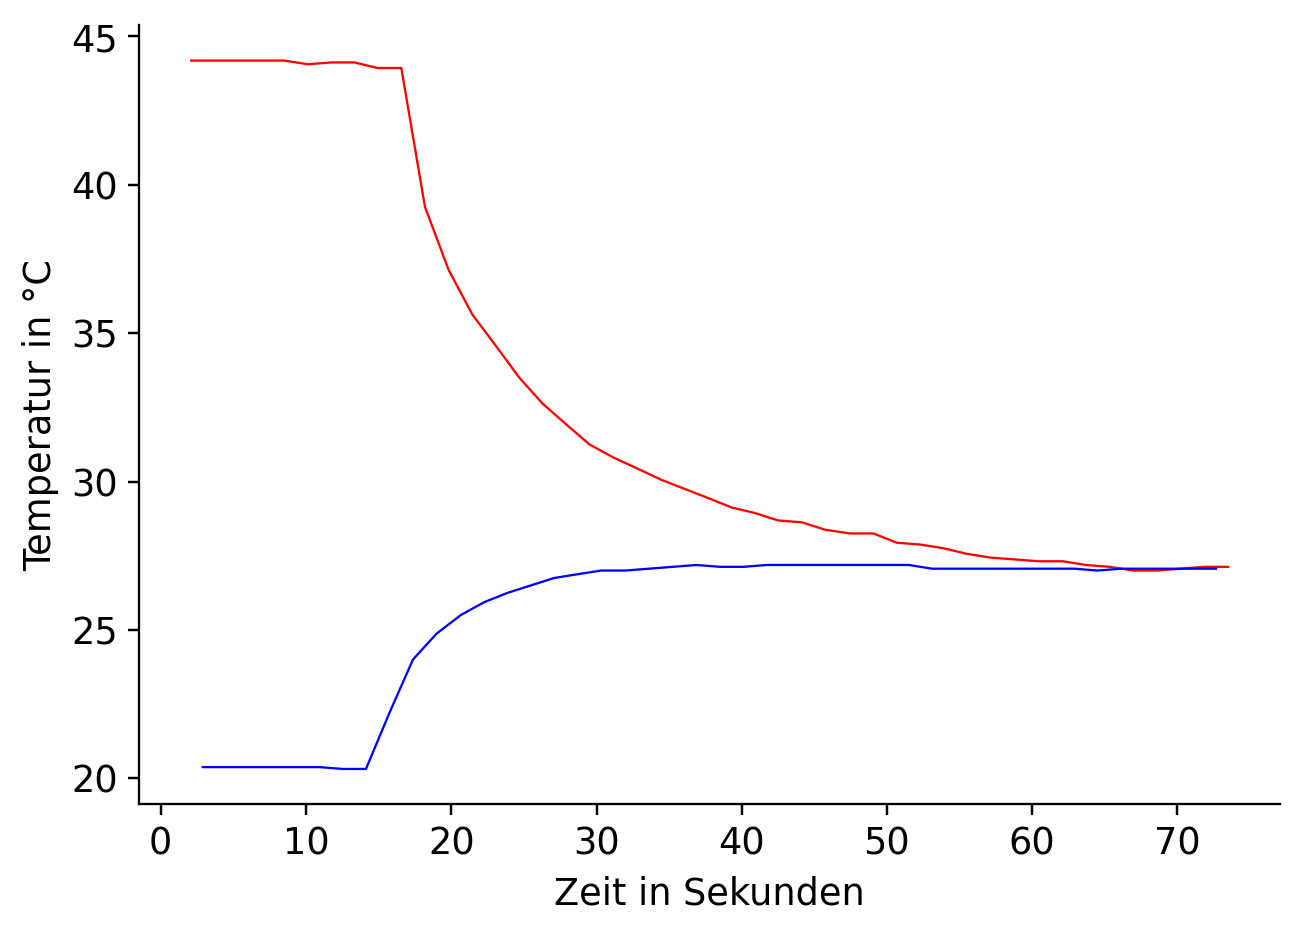

In [4]:
# TODO: Use the temperature and time data for plotting
plt.plot(timestamp_sensor1, temperature_sensor1, 'r')
plt.plot(timestamp_sensor2, temperature_sensor2, 'b')
plt.xlabel('Zeit in Sekunden')
plt.ylabel('Temperatur in °C')

# DONE #

#### (iii) Metadaten auslesen

Die notwendigen Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [5]:
# Heat capacity of Water
water_heat_capa = 4.18 #kJ/(kg*K)

# TODO: Read mass from the metadata of the experiment.
metadata = m_json.get_metadata_from_setup('datasheets/setup_heat_capacity.json')

UUID_probe = metadata['probe']['values'][0]
masses = []

masses.append(m_json.get_json_entry('/home/jovyan/work/calorimetry_home/datasheets', UUID_probe, ['probe', 'metadata', 'mass_coldwater']))
masses.append(m_json.get_json_entry('/home/jovyan/work/calorimetry_home/datasheets', UUID_probe, ['probe', 'metadata', 'mass_hotwater']))

# DONE #

#### (iV) Anfangs- und Endwert der Temperatur

In [6]:
# TODO: Calculation of temperature data necessary to determine the specific heat capacity
m_cup = float(masses[0])
m_add = float(masses[1])
T_1 = min(temperature_sensor1[0], temperature_sensor2[0]) 
T_2 = max(temperature_sensor1[0], temperature_sensor2[0])

#Da es schwer ist aufgrund von Messungenauigkeiten beide Sensoren auf die selbe Temperatur zu bringen, 
#wird der Einfachheit halber der Mittelwert der beiden Temperaturen als Mischtemperatur angenommen
T_M = (temperature_sensor1[-1] + temperature_sensor2[-1])/2
print(T_1,T_2,T_M)
# DONE #

20.375 44.1875 27.09375


#### (V) Wärmekapazität bestimmen
$$
C = \frac{m_{add}c_{w}(T_2-T_M)}{T_M - T_1} - m_{cup}c_{w}
$$
Dabei ist $m_{add}$ die Masse vom hinzugefügten Wasser, $T_2$ ist seine Temperatur. Die Masse vom Wasser im Behälter ist $m_{cup}$ und seine Temperatur ist $T_1$. Die Mischungstemperatur ist $T_M$. Die spezifische Wärmekapazität von Wasser ist $c_w$.

In [7]:
# TODO: Calculate heat capacity of the calorimeter
c_w = water_heat_capa
C = m_add*c_w*(T_2-T_M)/(T_M-T_1) - m_cup*c_w

# DONE #

#### (Vi) Ergebnis

In [8]:
# TODO: Print result
print(C, 'kJ/K')
# DONE #

0.7031926511627906 kJ/K


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.

Laut der Messung beträgt die Wärmekapazität der Flüssigkeit ca 0.7 kJ/K. Der Wert ist eher als kritisch zu betrachten, da der Einfluss der Umgebung (Wärmeaustausch mit dieser) nicht berücksichtigt wurde, welcher einen Einfluss auf die Mischtemperatur hat.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Der Versuch war sehr hilfreich, um nachvollziehen zu können, wie wichtig der Aufbau und die Übersicht über wissenschaftliche Versuche sind.
Meist brauchen diese Dinge länger als der Versuch selber, sind aber unumgänglich. Ich habe gelernt, wie man Metadaten und 
Messdaten einpflegt und die Struktur von HDF5-Dateien besser kennengelernt